# Beispiel: Finite Elemente 

## a) Erstellen eines strukturierten Gitters

Die folgende Funktion erzeugt für das Einheitsquadrat $(0,1)^2 \subset \mathbb R^2$ ein strukturiertes Dreiecksgitter mit Gitterweite  $h=\frac{1}{n-1}$ . Das Gitter besteht aus $M=n^2$ Knoten und $N=2(n-1)^2$ Dreiecken. Zurückgeliefert werden:
 * ein Array `vtrs`  von Koordinaten der Form $\mathbb R^{M \times 2}$, wobei `vtrs(j,1)` und `vtrs(j,2)` die $x-$ bzw. $y-$Koordinate des j-ten Vertex sind.
 
 * ein Array `tris` von Dreiecksindizes der Form $\mathbb N^{N \times 3}$, wobei `vrts(tris(i,1))`, `vrts(tris(i,2))` und `vrts(tris(i,3))` die Koordinaten der Eckknoten des i-ten Dreiecks sind.
 
* ein Array `vrtMarks` von Markierungen der Form $\mathbb N^M$, wobei `vrtMarks(i) == 0`, falls das i-te Vertex ein innerer Knoten ist und `vrtMarks(i) == 1`, falls das i-te Vertex ein Randknoten ist.

In [1]:
function [vrts, tris, vrtMarks] = CreateStructureGrid(n)
    # Create triangles
    tris = [];
    for j=1:n-1
        for i=1:n-1
            tris = [tris; [(j-1)*n+i (j-1)*n+(i+1)  j*n+(i+1)]];
            tris = [tris;[(j-1)*n+i j*n+(i+1) j*n+i]];
        endfor 
    endfor
    
    # Dirichlet marks
    dirichlet = zeros(n*n,1);
    
    # Create positions
    h = 1.0/(n-1)
    vrts=[];
    ind = 1
    for j=0:n-1
        for i=0:n-1
           vrts = [vrts; [i*h j*h]];
           if ((i==0) || (j==0) || (i+1==n) || (j+1==n))  
           vrtMarks(ind)=1;
           end
           ind = ind+1;
        endfor 
    endfor
endfunction


Dies können wir nun auch visualisieren:

h =  0.12500
ind =  1


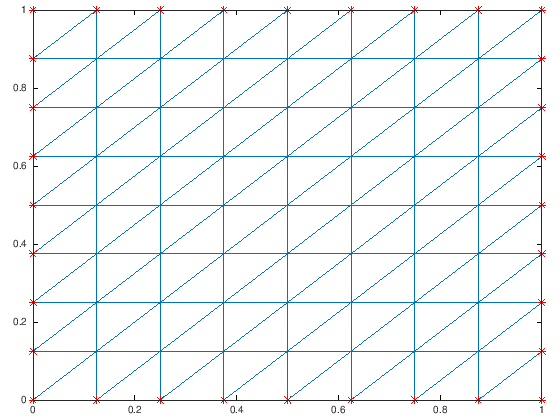

In [2]:

[vertices, elements, marks] = CreateStructureGrid(9); # 9,17,33,65
vertices;
elements;

triplot (elements, vertices(:,1), vertices(:,2));
hold on;

dirichletInd=find(marks==1);
plot (vertices(dirichletInd,1), vertices(dirichletInd,2), "r*");


## b) Schwache Formulierung und Diskretisierung

Die diskrete schwache Formulierung zu 

$$- \triangle u = f  \text{ in }\Omega$$

lautet:

Suche $u_h \in V_h$:

$$ \int\limits_\Omega \nabla u_h \nabla \Phi_\alpha \, dx = \int\limits_\Omega f \Phi_\alpha \, dx
$$
für alle $\alpha$, wobei $u_h (x) =\sum_\beta u_h^\beta \Phi_\beta(x)$ zusätzlich ggf. die Randbedingungen erfüllen muss.


Der Koeffizientenvektor $(u_h^\beta)$ ergibt sich somit als Lösung eines linearen Gleichungssystems:

$$ A_{\alpha, \beta} u_h^\beta = b_\alpha$$
wobei 
$$
A_{\alpha, \beta} = \int\limits_\Omega \nabla \Phi_\beta(x) \nabla \Phi_\alpha (x)\, dx = \sum_i \int_{T_i} \nabla \Phi_\beta (x)\nabla \Phi_\alpha(x) \, dx 
$$
$$
b_{\alpha}=\int_{\Omega} f(x) \Phi_{\alpha} (x) dx  = \sum_i \int_{T_i} f(x) \Phi_{\alpha} (x) dx
$$



### Konkrete Berechnung
Die Integrale auf der rechten Seite können durch Transformation auf das Referenzdreieck 
$$T_{ref}=((0,0), (1,0), (0,1)) $$
bestimmt werden. Für ein beliebiges Dreieck $ T= (x_\alpha, x_\beta, x_\gamma)$ ist diese als
$$F_T : T_{ref} \rightarrow T, \hat x \mapsto x = B \hat x + x_\alpha $$
darstellbar. Insbesondere entspricht $B=B(T)$ der Jacobimatrix $DF_T$. Sei $C = (B^T)^{-1}$. Dann gelten die Transformationsvorschriften:

$$ \int_{T} \nabla \Phi_{\beta} \nabla \Phi_{\alpha} (x) dx  =  \int_{\hat T} (C\nabla \Phi_{\alpha} (F_T((\hat x)) ) (C \nabla \Phi_{\alpha} (F_T((\hat x)) )|det B|\, d\hat x$$

$$ \int_{T} f(x) \Phi_{\alpha} (x) dx  = \int_{\hat T} f(F_T((\hat x)) \Phi_{\alpha} (F_T((\hat x)) |det DF_T| d\hat x \approx 0.5 \sum_j w_j f(F_T((\hat x_j)) \Phi_{\alpha} (F_T((\hat x_j)) |det B| $$
Integrale über das Referenzelement $T_{ref}$ können wir dabei mit numerischer Quadratur berechnen:

$$
\int g(\hat x) \, d\hat x  \approx 0.5 \sum_j w_j g(\hat x_j)$$
Dabei sind $\hat x_j$ Integrationspunkte und $w_j$ Integrationsgewichte.


In [3]:
function A = AssembleMatrix(tri, positions
...
endfunction

parse error:

  invalid parameter list

>>> endfunction
              ^



In [4]:
function b = AssembleRHS(tri, positions, func)

NumVtx = size(positions)(1)
numT = size(tri)
b = zeros(NumVtx, 1);

Xloc = [0.659027622374092  0.231933368553031;
        0.659027622374092  0.109039009072877;
        0.231933368553031  0.659027622374092;
        0.231933368553031  0.109039009072877;
        0.109039009072877  0.659027622374092;
        0.109039009072877  0.231933368553031]';
        
w = [1/6 1/6 1/6 1/6 1/6 1/6 ]';

# Iterate over elements
for i=1:numT

    # Get nodes and positions.
    indT = tri(i,:);
    posT = positions(indT,:);
    

    # Compute transformation
    DF = [posT(2,1)- posT(1,1) posT(3,1)- posT(1,1); posT(2,2)- posT(1,2) posT(3,2)- posT(1,2)];
    detT = abs(det(DF));
    areaRef = 0.5;
     
    # Basisfunktionen
    phi1 = ones (1,6) - (Xloc(1,:)+Xloc(2,:));
    phi2 = Xloc(1,:);
    phi3 = Xloc(2,:);
    
    posT;
    xglob = DF * Xloc +  posT(1,:)';
    
    # Debug Ausgabe (Quadraturpunkte)
    # plot (xglob(1,:), xglob(2,:), "g*");
    
    f = func(xglob(1,:), xglob(2,:));
    
    fv1 = (f.*phi1)*w;
    fv2 = (f.*phi2)*w;
    fv3 = (f.*phi3)*w;
    
    # Local RHS
    b(indT(1)) += areaRef* fv1 *detT;
    b(indT(2)) += areaRef* fv2 *detT;  
    b(indT(3)) += areaRef* fv3 *detT;
    
  
end

endfunction


### Numerische Experimente
Das Verfahren soll nun mit der rechten Seite $f(x,y) = 2 \pi^2 \sin(\pi x) \sin(\pi y)$ getestet werden, für welche sich die Lösung  
$$u(x,y) = \sin(\pi x) \sin(\pi y)$$ 
ergibt. 


In [5]:
function val=fsol(x,y)
 val=2*pi*pi*sin(pi*x).*sin(pi*y);
endfunction

Zunächst werden die Matrix und die rechte Seite assembliert:

In [6]:
Ah = AssembleMatrix(elements, vertices);

uh = zeros(size(Ah)(1),1);
bh = zeros(size(Ah)(1),1);

# Debug Ausgabe (Quadraturpunkte)
# triplot (elements, vertices(:,1), vertices(:,2));
# hold on

bh = AssembleRHS(elements, vertices, @fsol);

NumVtx =  81
numT =

   128     3

NumVtx =  81
numT =

   128     3



In den Randknoten muss die Lösung noch fixiert werden:

In [7]:
[Ah, bh] = SetDirichletValues(Ah,bh, find(marks==1), vertices, @fsol);

Nun kann das Gleichungssystem gelöst werden:

In [8]:
uh = linsolve(Ah,bh);

Es verbleibt die grafische Darstellung:

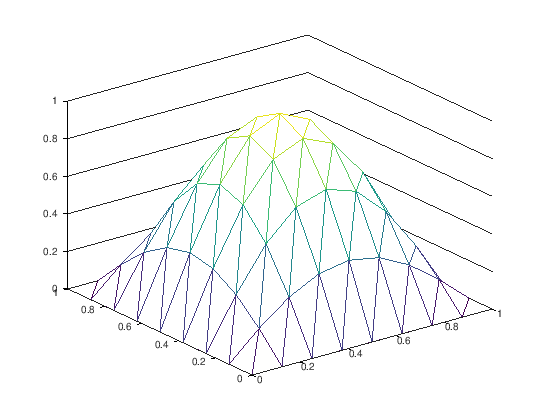

In [9]:
trimesh(elements,vertices(:,1),vertices(:,2), uh(:));

sowie die Berechnung des numerischen Fehlers

ans =  0.012711


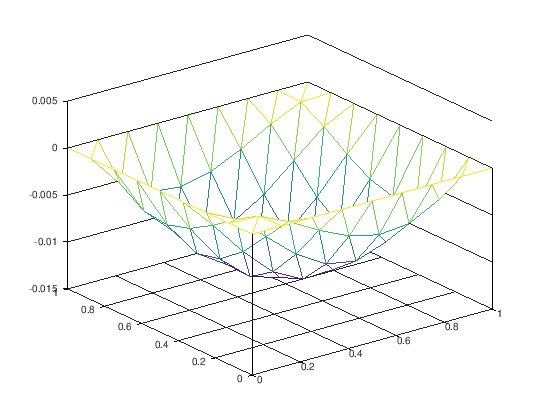

In [12]:
uref = zeros(size(uh)(1),1);
for i = 1:size(vertices(:,1))
    uref(i) = fsol(vertices(i,1),vertices(i,2))/(2*pi*pi);
end
#uref'
norm(uref(:)-uh(:),Inf)
trimesh(elements,vertices(:,1),vertices(:,2), uh(:)-uref(:));